# Classification: Ensemble

## Data import

In [10]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [11]:
df

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


target
0    500
1    268
dtype: int64


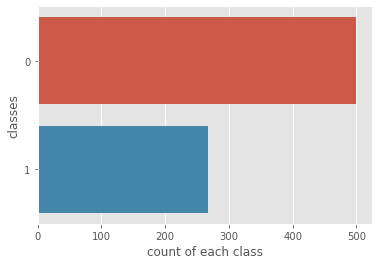

In [12]:
#Print class freq. through pandas 
print(df.groupby('target').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.target ,data=df)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [13]:
#gives information about the data types,columns, null value counts, memory usage etc
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timespreg  768 non-null    int64  
 1   gluctol    768 non-null    int64  
 2   diaspb     768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   massindex  768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Preparation

### Separate Train/Test sets


In [14]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#X.head()
#y.head()

In [15]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


# Random Forest

![RF](rf.png)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier= RandomForestClassifier()
parameters = {'n_estimators' : [50, 100, 200],
    'criterion' : ['entropy', 'gini'],
             'max_depth' : [1,2,3,4], 
             'min_samples_split' : [4,5,10],
              'min_samples_leaf' : [4,5,10]
             }

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

gs.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [4, 5, 10],
                         'min_samples_split': [4, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=10)

In [8]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.586395 using {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
0.194142 (0.189374) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 50}
0.108194 (0.131533) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
0.208273 (0.090671) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 200}
0.214414 (0.164567) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
0.221307 (0.040357) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
0.170565 (0.123693) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
0.196919 (0.176755) with: {'cri

In [9]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       150
           1       0.67      0.41      0.51        81

    accuracy                           0.72       231
   macro avg       0.70      0.65      0.66       231
weighted avg       0.71      0.72      0.70       231



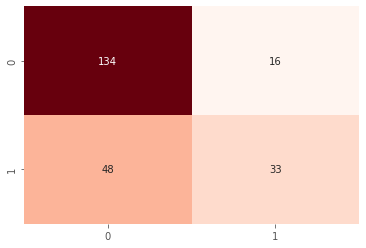

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

In [14]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=4, min_samples_split=5, min_samples_leaf=4)
rand_forest.fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)

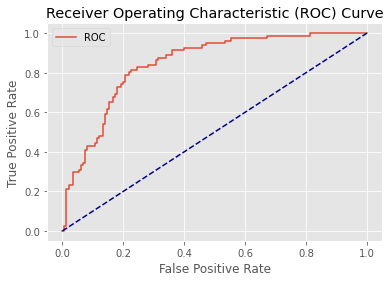

AUC: 0.85


In [15]:
# ROC curve

from sklearn import metrics

y_probs = rand_forest.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

<AxesSubplot:>

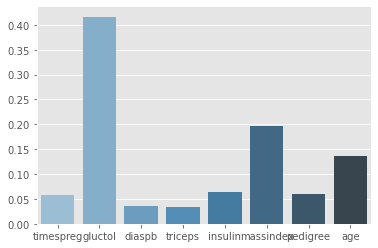

[CV 3/3; 202/216] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.505 total time=   0.1s
[CV 2/3; 203/216] START criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 2/3; 203/216] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.610 total time=   0.3s
[CV 3/3; 204/216] START criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=200
[CV 3/3; 204/216] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.515 total time=   0.7s
[CV 1/3; 207/216] START criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 1/3; 207/216] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.585 total time=   0.6s
[CV 1/3; 209/216] START criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=4, n_e

[CV 1/3; 188/216] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.602 total time=   0.3s
[CV 3/3; 189/216] START criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=200
[CV 3/3; 189/216] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=0.484 total time=   0.5s
[CV 3/3; 191/216] START criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100
[CV 3/3; 191/216] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.500 total time=   0.3s
[CV 1/3; 193/216] START criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/3; 193/216] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.604 total time=   0.1s
[CV 2/3; 193/216] START criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=5, n

In [16]:
sns.barplot(x=X_train.columns, y=rand_forest.feature_importances_, palette="Blues_d")


## Adaboost

![Adab](adab.png)

error = sum of the weights associated to the incorrectly classified samples. error $\in [0,1]$

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

adaboost = AdaBoostClassifier(n_estimators=1000, base_estimator=DecisionTreeClassifier(max_depth=3))
adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

y_pred_train = adaboost.predict(X_test)
print("f1_score: ", metrics.f1_score(y_test, y_pred))

f1_score:  0.6125


In [19]:
## from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

classifier= AdaBoostClassifier()
parameters = {'n_estimators' : [2000, 5000],
    'learning_rate' : [0.0001, 0.01, 0.1, 1, 10]}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

gs.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.01, 0.1, 1, 10],
                         'n_estimators': [2000, 5000]},
             scoring='f1', verbose=10)

In [20]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.611641 using {'learning_rate': 0.01, 'n_estimators': 5000}
0.567578 (0.061997) with: {'learning_rate': 0.0001, 'n_estimators': 2000}
0.510947 (0.023410) with: {'learning_rate': 0.0001, 'n_estimators': 5000}
0.607584 (0.051971) with: {'learning_rate': 0.01, 'n_estimators': 2000}
0.611641 (0.065904) with: {'learning_rate': 0.01, 'n_estimators': 5000}
0.583255 (0.052983) with: {'learning_rate': 0.1, 'n_estimators': 2000}
0.574080 (0.051862) with: {'learning_rate': 0.1, 'n_estimators': 5000}
0.541041 (0.014021) with: {'learning_rate': 1, 'n_estimators': 2000}
0.545870 (0.015748) with: {'learning_rate': 1, 'n_estimators': 5000}
0.277418 (0.078891) with: {'learning_rate': 10, 'n_estimators': 2000}
0.277418 (0.078891) with: {'learning_rate': 10, 'n_estimators': 5000}


In [21]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

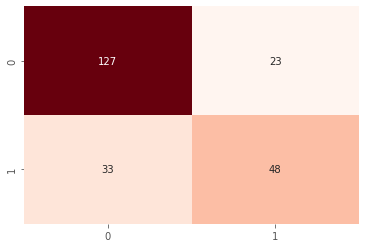

In [22]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.68      0.59      0.63        81

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



In [24]:
y_pred_train = best_model.predict(X_train)
print("f1_score_train: ", metrics.f1_score(y_train, y_pred_train))
print("f1_score_test: ", metrics.f1_score(y_test, y_pred))

f1_score_train:  0.7383720930232558
f1_score_test:  0.631578947368421
[CV 1/3; 2/10] START learning_rate=0.0001, n_estimators=5000....................
[CV 1/3; 2/10] END learning_rate=0.0001, n_estimators=5000;, score=0.543 total time=  15.3s
[CV 3/3; 3/10] START learning_rate=0.01, n_estimators=2000......................
[CV 3/3; 3/10] END learning_rate=0.01, n_estimators=2000;, score=0.537 total time=   6.4s
[CV 3/3; 4/10] START learning_rate=0.01, n_estimators=5000......................
[CV 3/3; 4/10] END learning_rate=0.01, n_estimators=5000;, score=0.519 total time=  17.3s
[CV 3/3; 6/10] START learning_rate=0.1, n_estimators=5000.......................
[CV 3/3; 6/10] END learning_rate=0.1, n_estimators=5000;, score=0.513 total time=  17.3s
[CV 3/3; 8/10] START learning_rate=1, n_estimators=5000.........................
[CV 3/3; 8/10] END learning_rate=1, n_estimators=5000;, score=0.542 total time=  17.7s
[CV 3/3; 10/10] START learning_rate=10, n_estimators=5000....................

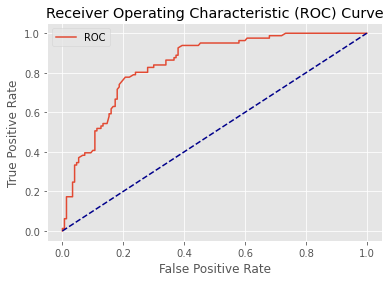

AUC: 0.84
[CV 1/3; 201/216] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=0.619 total time=   0.6s
[CV 3/3; 203/216] START criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 3/3; 203/216] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.490 total time=   0.3s
[CV 1/3; 205/216] START criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50
[CV 1/3; 205/216] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.642 total time=   0.1s
[CV 2/3; 205/216] START criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50
[CV 2/3; 205/216] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.596 total time=   0.1s
[CV 1/3; 206/216] START criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_spli

[CV 3/3; 210/216] END criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=4, n_estimators=200;, score=0.489 total time=   0.5s
[CV 1/3; 213/216] START criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=200
[CV 1/3; 213/216] END criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.604 total time=   0.6s
[CV 3/3; 214/216] START criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=50
[CV 3/3; 214/216] END criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.510 total time=   0.2s
[CV 1/3; 216/216] START criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=200
[CV 1/3; 216/216] END criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=0.625 total time=   0.5s
[CV 2/3; 1/10] START learning_rate=0.0001, n_estimators=2000....................
[CV 2/3; 

In [22]:
adaboost = AdaBoostClassifier(n_estimators=1000, learning_rate=0.01)

adaboost.fit(X_train,y_train)

y_probs = adaboost.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

### Remember, Bagging and Boosting methods are not restricted to trees for weak learners!

# Gradient boosting

![GB](gb.png)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[20,50,70,100,200], "learning_rate":[0.1, 0.5,1,2], 
              "random_state" : [0] ,
             "max_depth":[1,2]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1',) 

gs = gs.fit(X_train,y_train)


#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.613741 using {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 70, 'random_state': 0}
0.517874 (0.055957) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 20, 'random_state': 0}
0.590224 (0.078565) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50, 'random_state': 0}
0.597576 (0.073275) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 70, 'random_state': 0}
0.593922 (0.064271) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100, 'random_state': 0}
0.602311 (0.056104) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200, 'random_state': 0}
0.577497 (0.066815) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 20, 'random_state': 0}
0.576523 (0.039780) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'random_state': 0}
0.580307 (0.023570) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 70, 'random_state': 0}
0.587088 (0.035904) with: {'learning_r

0.6216216216216215

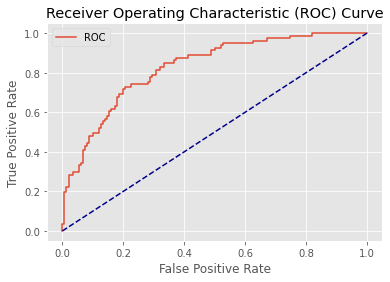

AUC: 0.83


In [9]:
from sklearn import metrics

gboost = GradientBoostingClassifier(learning_rate= 1, max_depth= 1, n_estimators= 70)

gboost.fit(X_train,y_train)

y_probs = gboost.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)